In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import shap
from PIL import Image

In [2]:
from yolov4.tf import YOLOv4

In [3]:
tf.__version__

'2.3.1'

In [4]:
# path_weights = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\darknet\yolov3.weights"
# path_cfg = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\darknet\cfg\yolov3.cfg"

In [5]:
path_weights = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\Evaluation\our-yolov4-tiny-custom_final.weights"
path_cfg = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\Evaluation\our-yolov4-tiny-custom.cfg"
path_cfg_neu = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\Evaluation\our-yolov4-tiny-custom_for_tf.cfg"

In [6]:
img_path = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\preprocessing\output\run_DZ\obj\Haber_bosch_20.jpg"

In [7]:
# img_path_2 = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\darknet\dog.jpg"

In [8]:
path_class_txt = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\preprocessing\data\classes.txt"
classes = []
with open(path_class_txt, 'r') as f:
    classes = f.read().splitlines()

In [9]:
# path_class_txt = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\darknet\data\coco.names"
# classes = []
# with open(path_class_txt, 'r') as f:
#     classes = f.read().splitlines()

In [10]:
net = cv2.dnn.readNet(path_weights,path_cfg)

In [11]:
img = cv2.imread(img_path)
height, width, _ = img.shape

In [12]:
blob = cv2.dnn.blobFromImage(img, 1/255, (416,416), (0,0,0), swapRB=True, crop = False)

In [13]:
yolo = YOLOv4()

In [14]:
yolo.config.parse_names(path_class_txt)
yolo.config.parse_cfg(path_cfg_neu)

In [15]:
yolo.make_model()

In [16]:
yolo.load_weights(path_weights, weights_type="yolo")
yolo.summary(summary_type="yolo")
yolo.summary()

batch: 1
index layer No. filters  size/strd(dil)   input_shape         output_shape    1e9 flops
   0  convo_0      32      3 x 3 / 2      416 x 416 x   3 ->  208 x 208 x  32   0.075
   1  convo_1      64      3 x 3 / 2      208 x 208 x  32 ->  104 x 104 x  64   0.399
   2  convo_2      64      3 x 3 / 1      104 x 104 x  64 ->  104 x 104 x  64   0.797
   3  route_0       2,                                    ->  104 x 104 x  32
   4  convo_3      32      3 x 3 / 1      104 x 104 x  32 ->  104 x 104 x  32   0.199
   5  convo_4      32      3 x 3 / 1      104 x 104 x  32 ->  104 x 104 x  32   0.199
   6  route_1       5,  4,                                ->  104 x 104 x  64
   7  convo_5      64      1 x 1 / 1      104 x 104 x  64 ->  104 x 104 x  64   0.089
   8  route_2       2,  7,                                ->  104 x 104 x 128
   9  maxpo_0              2 x 2 / 2      104 x 104 x 128 ->   52 x  52 x 128   0.001
  10  convo_6     128      3 x 3 / 1       52 x  52 x 128 ->   52 x

In [17]:
yolo.inference(media_path=img_path)

time: 4258.88 ms
YOLOv4: Inference is finished


In [21]:
img = cv2.imread(img_path, cv2.GREYSCALE)
predict_ = yolo.predict(img, 0.7)
predict_

array([[0.42862225, 0.36696905, 0.05485253, 0.5302455 , 8.        ,
        0.82839674]], dtype=float32)

In [22]:
cv2.imshow('',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [129]:
def f(X):
    tmp = X.copy()
    return yolo.predict(img, 0.7)

In [78]:
img = cv2.imread(img_path)

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.


(-0.5, 415.5, 415.5, -0.5)

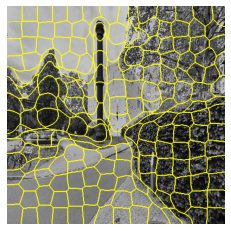

In [127]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
segments = slic(img, n_segments = 200, sigma = 10)
# show the output of SLIC
fig = plt.figure("Superpixels -- %d segments" % (100))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, segments))
plt.axis("off")

In [128]:
segments

array([[  0,   0,   0, ...,  13,  13,  13],
       [  0,   0,   0, ...,  13,  13,  13],
       [  0,   0,   0, ...,  13,  13,  13],
       ...,
       [181, 181, 181, ..., 188, 188, 188],
       [181, 181, 181, ..., 188, 188, 188],
       [181, 181, 181, ..., 188, 188, 188]], dtype=int64)

In [136]:
np.array([[1 for _ in range(img.flatten().shape[0])]])

array([[1, 1, 1, ..., 1, 1, 1]])

In [137]:
background_ = np.array([[1 for _ in range(img.flatten().shape[0])]])

In [138]:
img_flat = img.flatten()

In [139]:
explainer = shap.KernelExplainer(f,background_)

In [140]:
shap_values = explainer.shap_values(img_flat)

MemoryError: Unable to allocate 1.96 TiB for an array with shape (1039694, 519168) and data type int32

In [91]:
f(img)

array([[0.42862225, 0.36696905, 0.05485253, 0.5302455 , 8.        ,
        0.82839674]], dtype=float32)

In [132]:
shap_values

[array([0.]),
 array([0.]),
 array([0.]),
 array([-1.11022302e-16]),
 array([8.8817842e-16]),
 array([1.11022302e-16])]

In [47]:
explainer.input_shape

(519168,)

In [48]:
img.shape

(416, 416, 3)

In [50]:
background_super_pixel = np.array([[1 for _ in range(10)]])

In [51]:
background_super_pixel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

102973440/102967424 [==============================] - 3s 0us/step


Partition explainer:  50%|███████████████████████████████████▌                                   | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [01:32, 46.09s/it]                                                                            


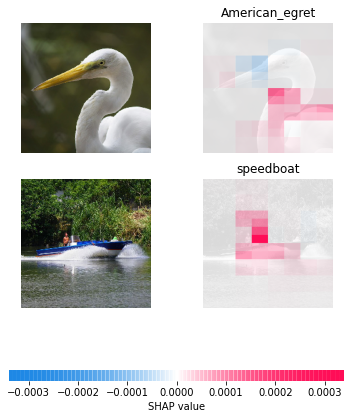

In [24]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import json
import shap
import tensorflow as tf

# load pre-trained model and choose two images to explain
model = ResNet50(weights='imagenet')
def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)
X, y = shap.datasets.imagenet50()

# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)